In [69]:
#https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

np.set_printoptions(precision=3)


In [70]:
#import sklearn 
iris = datasets.load_iris()

In [71]:
#type(iris.data)
type(iris.target)

numpy.ndarray

In [72]:
#iris_df=pd.DataFrame(iris.data,iris.target).reset_index()
#iris_df

In [73]:
X = iris.data[:, :2]
y = iris.target

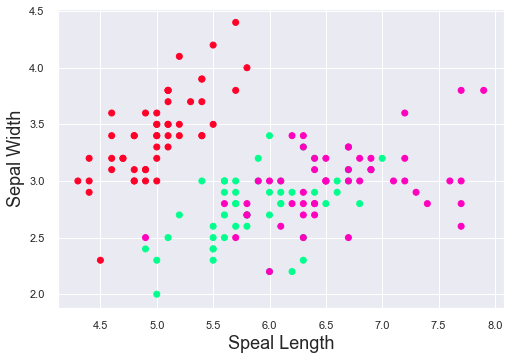

In [74]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Speal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18);

In [75]:
km = KMeans(n_clusters = 3, random_state=123)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs='deprecated',
       precompute_distances='deprecated', random_state=123, tol=0.0001,
       verbose=0)

In [76]:
centers = km.cluster_centers_
print(centers)

[[6.813 3.074]
 [5.006 3.428]
 [5.774 2.692]]


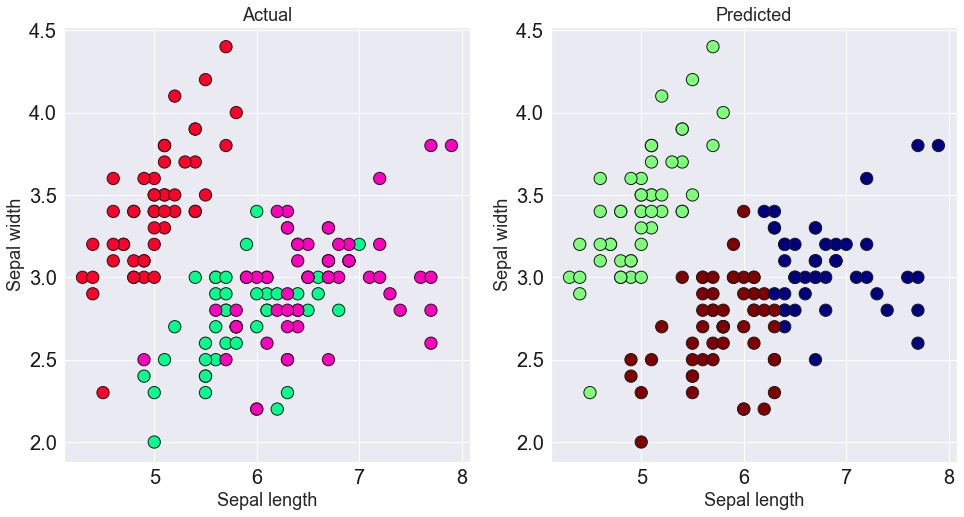

In [77]:
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18);

In [78]:
#https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a


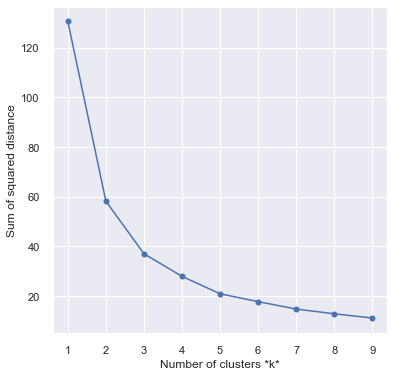

In [79]:

sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

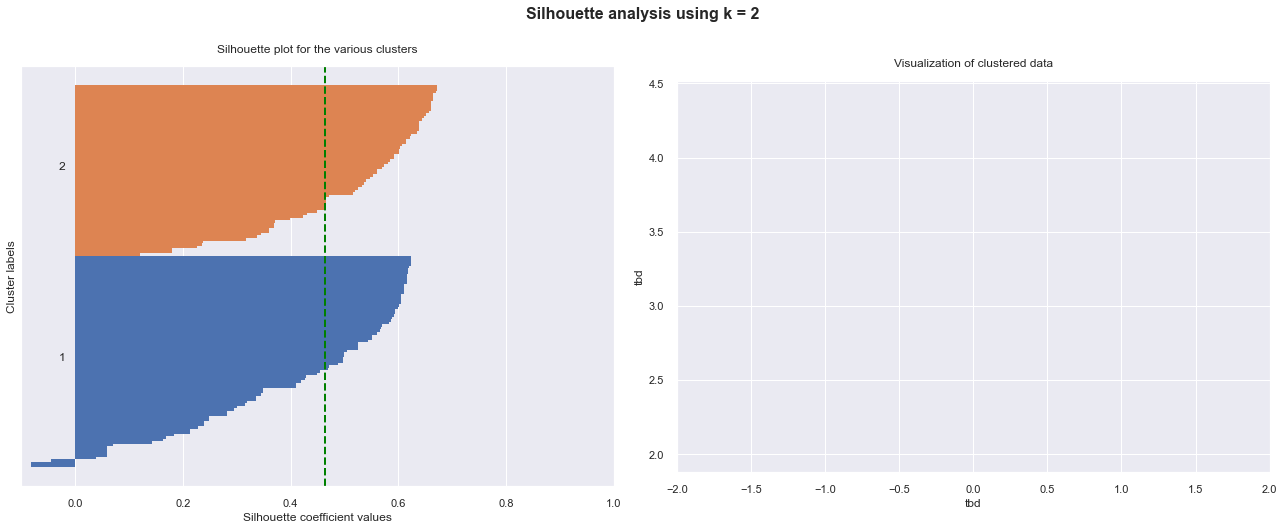

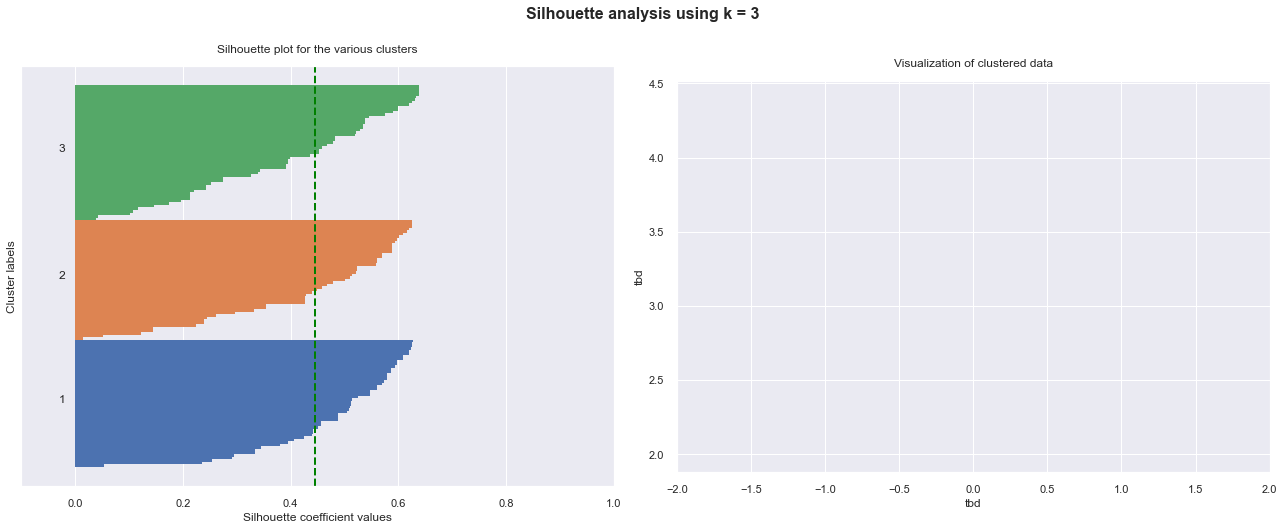

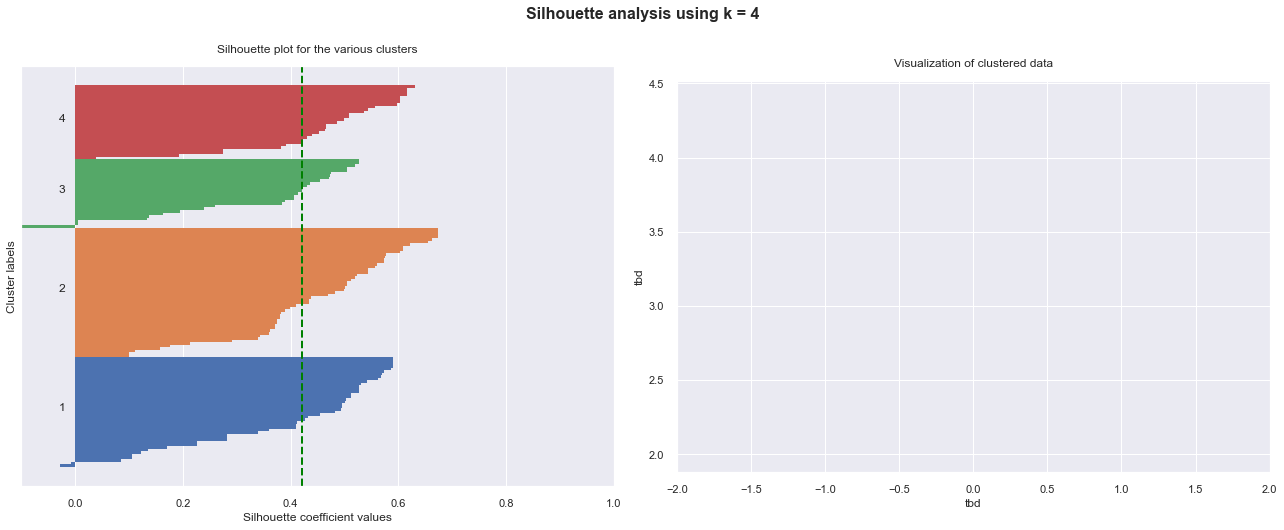

In [80]:
from sklearn.metrics import silhouette_samples

for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X[:, 0], X[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('tbd')
    ax2.set_ylabel('tbd')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

In [81]:
#using pycaret
#https://github.com/pycaret/pycaret/blob/master/tutorials/Clustering%20Tutorial%20Level%20Beginner%20-%20CLU101.ipynb
from pycaret.clustering import *

In [82]:
X_df=pd.DataFrame(X)

In [83]:
exp_clu101 = setup(X_df, normalize = True, 
                   session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(150, 2)"
2,Missing Values,False
3,Numeric Features,2
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(150, 2)"
9,CPU Jobs,-1


In [90]:
kmeans = create_model('kmeans',num_clusters = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.401,139.6946,0.8026,0,0,0


In [91]:
kmeans.inertia_

61.809

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4092,150.0375,0.7409,0,0,0


[58.204092789066756, 37.0507021276596, 27.990212038303703, 21.516279487675817, 17.801536414565827, 15.45509173669468, 13.010371336996345]


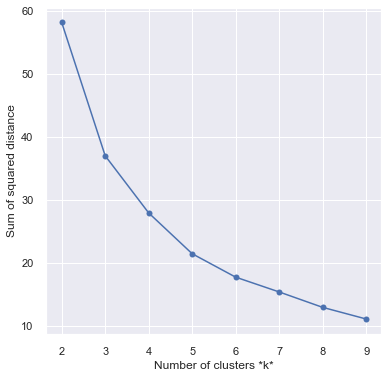

In [87]:
np.set_printoptions(precision=3)
%precision 3

sse = []
list_k = list(range(2, 10))
for k in list_k:
    km = create_model('kmeans',num_clusters = k)
    km.fit(X)
    print(sse)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

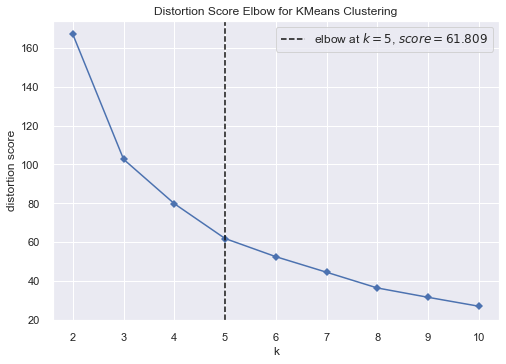

In [92]:
plot_model(kmeans, plot = 'elbow')

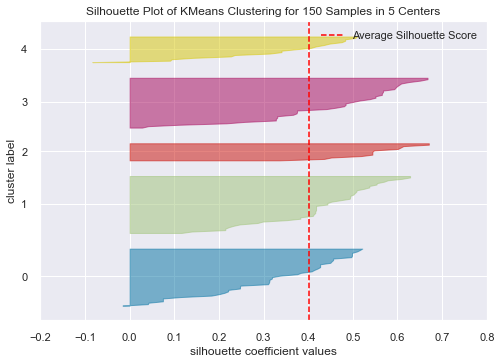

In [93]:
plot_model(kmeans, plot = 'silhouette')

In [94]:
plot_model(kmeans, plot = 'distribution') #to see size of clusters

In [37]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()

NameError: name 'data_unseen' is not defined